# El tratamiento de las variables categoricas 

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [9]:
df=pd.read_csv("../python-ml-course/datasets/ecom-expense/Ecom Expense.csv")
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [10]:
dummy_gender=pd.get_dummies(df["Gender"],prefix="Gender")
dummy_city_tier=pd.get_dummies(df["City Tier"],prefix="City")


In [11]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [12]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [13]:
column_name=df.columns.values.tolist()

In [14]:
column_name

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [15]:
df_new=df[column_name].join(dummy_gender)
column_name=df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [16]:
df_new=df_new[column_name].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [17]:
feature_cols=["Monthly Income","Transaction Time",
              "Gender_Female","Gender_Male",
              "City_Tier 1","City_Tier 2","City_Tier 3"
            ,"Record" ]

In [18]:
x=df_new[feature_cols]
y=df_new["Total Spend"]

In [19]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [21]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [22]:
lm.score(x,y)

0.9179923586131016

El modelo puede ser escrito como:
* Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Gender_Female'* -131.02501325554567 + 'Gender_Male'* 131.0250132555456+'City_Tier 1'* 76.76432601049527 + 'City_Tier 2'* 55.138974309232474 + 'City_Tier 3'* -131.9033003197278+'Record'* 772.2334457445648
    * Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 +'Record'* 772.2334457445648
    * Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545+'Record'* 772.2334457445648
    * Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
    * Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456+ 55.138974309232474  +'Record'* 772.2334457445648
    * Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income'* 0.14753898049205738 + 'Transaction Time'* 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648

In [23]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income']*0.14753898049205738 + df_new['Transaction Time']* 0.15494612549589545+ df_new['Gender_Female'] * (-131.02501325554567) + df_new['Gender_Male'] * 131.0250132555456+ df_new['City_Tier 1']* 76.76432601049527 +  df_new['City_Tier 2']* 55.138974309232474 + df_new['City_Tier 3']* (-131.9033003197278)+ df_new['Record']* 772.2334457445648

In [24]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [25]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [26]:
SSD

1517733985.3408163

In [27]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [28]:
RSE

803.1318809818165

In [29]:
sales_mean=np.mean(df_new["Total Spend"])

In [30]:
sales_mean

6163.176415976714

In [31]:
error = RSE/sales_mean

In [32]:
error*100

13.031135680294161

## Eliminar variabes dummys redundantes 

In [33]:
dummy_gender=pd.get_dummies(df["Gender"],prefix="Gender").iloc[:,1:]
                           
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [34]:
dummy_city_tier=pd.get_dummies(df["City Tier"],prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [35]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [36]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
print(lm.intercept_)

-133.67781754642238


In [38]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [39]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738),
* ('Transaction Time', 0.15494612549589545),
* ('Gender_Female', -131.02501325554567),
* ('Gender_Male', 131.0250132555456),
* ('City_Tier 1', 76.76432601049527),
* ('City_Tier 2', 55.138974309232474),
* ('City_Tier 3', -131.9033003197278),
* ('Record', 772.2334457445648)
 
 Coeficientes tras enmascarar las variables dummy pertinentes
* 'Monthly Income', 0.14753898049205744),
* ('Transaction Time', 0.15494612549589631),
* ('Gender_Male', 262.05002651109595),
* ('City_Tier 2', -21.62535170126296),
* ('City_Tier 3', -208.66762633022324),
* ('Record', 772.2334457445635)]

Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02, 
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female: 
    * antes -> -131.02,
    * después -> 0
* CT1: 
    * antes -> 76.76,
    * después -> 0
* CT2: 
    * antes -> 55.13, 
    * después -> -21.62 = (55.13 - 76.76)
* CT3: 
    * antes -> -131.90, 
    * después -> -208.66 = (-131.90 - 76.76)

# Transformacion de una variables para conseguir una relacion no lineal

In [40]:
data_auto=pd.read_csv("../python-ml-course/datasets/auto/auto-mpg.csv")
data_auto.head()
x_data=(X[:,np.newaxis])

TypeError: '(slice(None, None, None), None)' is an invalid key

In [41]:
data_auto.shape

(406, 9)

In [42]:
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

In [44]:
data_auto["mpg"]=data_auto["mpg"].dropna()

In [45]:
data_auto["horsepower"]=data_auto["horsepower"].dropna()

Text(0.5, 1.0, 'CV VS MPG')

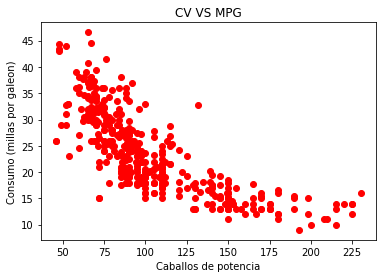

In [46]:
plt.plot(data_auto["horsepower"],data_auto["mpg"],'ro')
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (millas por galeon)")
plt.title("CV VS MPG")

### Modelo de regresion lineal
 * mpg=a+b*horsepower

In [47]:
X=data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y=data_auto["mpg"].fillna(data_auto["mpg"].mean())


In [48]:
lm=LinearRegression()
lm.fit(X[:,np.newaxis],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
type(X)

pandas.core.series.Series

In [50]:
type(X[:,np.newaxis])

numpy.ndarray

NameError: name 'x_data' is not defined

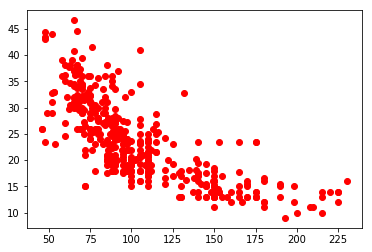

In [51]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(x_data),color="blue")

In [52]:
lm.score(x_data,Y)

NameError: name 'x_data' is not defined

In [53]:
SSD = np.sum((Y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

NameError: name 'x_data' is not defined

### Modelo de regresion cuadratico
 * mpg=a+b*hosepower^2

In [54]:
x_data=X**2
x_data=x_data[:,np.newaxis]

In [55]:
lm=LinearRegression()

In [56]:
lm.fit(x_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
lm.score(x_data,Y)

0.4849887034823205

In [58]:
SSD = np.sum((Y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

### Modelo regresion lineal y cuadratico 
 * mpg=a+b horsepower+c horsepowe^2

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [60]:
poly=PolynomialFeatures(degree=2)

In [61]:
x_data=poly.fit_transform(X[:,np.newaxis])

In [62]:
lm=linear_model.LinearRegression()
lm.fit(x_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
lm.score(x_data,Y)

0.6439066584257469

In [64]:
lm.intercept_

55.02619244708036

In [65]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg=55.02619244708036-0.43404318 hp + 0.00112615 hp^2

In [66]:
for d in range(2,12):
    poly = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data, Y)
    print("Regresión de grado "+str(d))
    print("R2:" +str(lm.score(x_data, Y)))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(x_data, Y, lm.predict(x_data))

Regresión de grado 2
R2:0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]


NameError: name 'regresion_validation' is not defined

In [67]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

## El problema de los outliers 

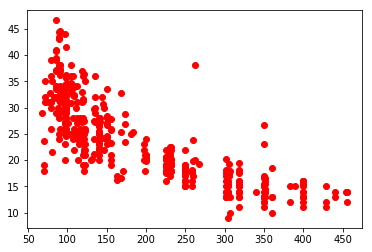

In [68]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")



In [69]:
X=data_auto["displacement"].fillna(data_auto["displacement"].mean())
X=X[:,np.newaxis]
Y=data_auto["mpg"].fillna(data_auto["mpg"].mean())
Y=Y[:,np.newaxis]
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
lm.score(X,Y)

0.6261049762826918

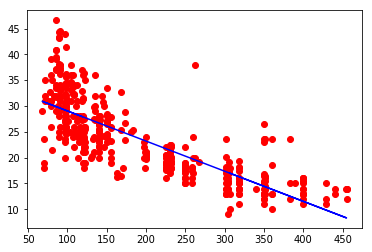

In [71]:
%matplotlib inline 
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),color="blue")

In [72]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [73]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [74]:
data_auto_clean=data_auto.drop([395,258,305,372])

In [75]:
X=data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X=X[:,np.newaxis]
Y=data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
Y=Y[:,np.newaxis]
lm=LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
lm.score(X,Y)

0.6466514317531822

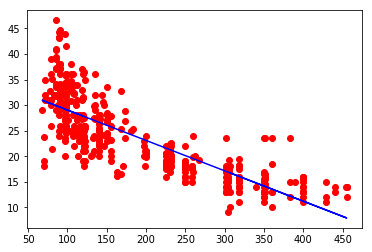

In [77]:
%matplotlib inline 
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),color="blue")

In [139]:
ds=pd.read_csv("../python-ml-course/datasets/sales/SalesJan2009.csv")
ds.head()


,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/09 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/09 6:00,1/2/09 6:08,51.500000,-1.116667
1,1/2/09 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/09 4:42,1/2/09 7:49,39.195000,-94.681940
2,1/2/09 13:08,Product1,1200,Mastercard,Federica e Andrea,Astoria,OR,United States,1/1/09 16:21,1/3/09 12:32,46.188060,-123.830000
3,1/3/09 14:44,Product1,1200,Visa,Gouya,Echuca,Victoria,Australia,9/25/05 21:13,1/3/09 14:22,-36.133333,144.750000
4,1/4/09 12:56,Product2,3600,Visa,Gerd W,Cahaba Heights,AL,United States,11/15/08 15:47,1/4/09 12:45,33.520560,-86.802500


In [141]:
ds.shape

(998, 12)

In [79]:
ds["Price"].sum()

1630500

In [80]:
ds["Country"]

0      United Kingdom
1       United States
2       United States
3           Australia
4       United States
5       United States
6       United States
7       United States
8              Israel
9              France
10      United States
11        Netherlands
12      United States
13      United States
14      United States
15            Ireland
16             Canada
17              India
18     United Kingdom
19      United States
20     United Kingdom
21            Ireland
22       South Africa
23      United States
24            Finland
25      United States
26      United States
27     United Kingdom
28      United States
29      United States
            ...      
968         Australia
969     United States
970     United States
971    Czech Republic
972    United Kingdom
973    United Kingdom
974           Romania
975             Malta
976     United States
977    United Kingdom
978            Turkey
979     United States
980    United Kingdom
981       New Zealand
982       

In [88]:
group_c = ds.groupby('Country')
group_c.groups

{'Argentina': Int64Index([606], dtype='int64'),
 'Australia': Int64Index([  3,  36,  51,  55, 120, 186, 199, 205, 207, 215, 223, 326, 327,
             389, 437, 525, 546, 562, 598, 605, 633, 635, 643, 652, 662, 668,
             677, 703, 707, 746, 774, 791, 792, 893, 968, 982, 987, 988],
            dtype='int64'),
 'Austria': Int64Index([251, 280, 281, 527, 636, 960, 990], dtype='int64'),
 'Bahrain': Int64Index([102], dtype='int64'),
 'Belgium': Int64Index([56, 123, 433, 573, 670, 780, 838, 886], dtype='int64'),
 'Bermuda': Int64Index([918], dtype='int64'),
 'Brazil': Int64Index([390, 434, 759, 852, 888], dtype='int64'),
 'Bulgaria': Int64Index([530], dtype='int64'),
 'Canada': Int64Index([ 16,  57,  59,  68,  71,  72,  74,  82,  83,  92,  97, 107, 111,
             113, 114, 122, 156, 162, 171, 201, 237, 286, 295, 299, 303, 318,
             319, 324, 337, 340, 351, 406, 425, 446, 453, 456, 460, 468, 479,
             516, 518, 587, 592, 597, 614, 615, 627, 638, 642, 648, 649, 672,

In [89]:
grouped_c.get_group("Female")

NameError: name 'grouped_c' is not defined

In [90]:
group_c["Price"].sum()

Country
Argentina                 1200
Australia                64800
Austria                  10800
Bahrain                   1200
Belgium                  12000
Bermuda                   1200
Brazil                   12300
Bulgaria                  1200
Canada                  124800
Cayman Isls               1200
China                     1200
Costa Rica                1200
Czech Republic            6000
Denmark                  18000
Dominican Republic        1200
Finland                   2400
France                   53100
Germany                  42000
Greece                    1200
Guatemala                 1200
Hong Kong                 1200
Hungary                   3600
Iceland                   1200
India                     2400
Ireland                  69900
Israel                    1200
Italy                    37800
Japan                     2400
Jersey                    1200
Kuwait                    1200
Latvia                    1200
Luxembourg                1200


In [92]:
group_s = ds.groupby('State')
group_s.groups
group_s["Price"].sum()

State
                        12000
AK                       8400
AL                       3600
AR                       9900
AZ                      16850
Aargau                   4800
Abu Zaby                 1200
Al Manamah               1200
Alberta                 26400
Alsace                   1200
Andalucia                1200
Andhra Pradesh           1200
Antwerpen                1200
Arhus                    1200
Attiki                   1200
Auckland                 4800
Bacs-Kiskun              1200
Baden-Wurttemberg        6000
Basel-Country            4800
Basel-Town               1200
Bayern                   9600
Berlin                   1200
Bern                     3600
Black River              3600
Bohol                    1200
British Columbia        28800
Brittany                 8700
Brussels (Bruxelles)     9600
Bucuresti                1200
Budapest                 1200
                        ...  
Tipperary                2400
Tokyo                    2400
Tusc

In [93]:
group_p = ds.groupby('Product')
group_p.groups
group_p["Price"].count()

Product
Product1     847
Product2     136
Product3      14
Product3       1
Name: Price, dtype: int64

In [94]:
group_p = ds.groupby('Payment_Type')
group_p.groups
group_p["Product"].count()

Payment_Type
Amex          110
Diners         89
Mastercard    277
Visa          522
Name: Product, dtype: int64

In [95]:
ds[['Price']].max(axis=0)
max=ds[ds['Price']==13000]
max[["Price","Name"]]


,Price,Name
558,13000,sandhya


In [138]:
ds[['Price']].min(axis=0)
min=ds[ds['Price']==250]
min[["Price","Name","Latitude","Longitude"]]

,Price,Name,Latitude,Longitude
477,250,Tabatha,34.18972,-118.13028


In [136]:
dn=ds.groupby("Name")
dsum=dn.sum()
dsum[['Price']]


,Price
Name,
A,1200
AMY,1200
Aaron,1200
Abdul-L,3600
Abikay,2400
Adam,1200
Aidan,1200
Aideen and Jonathan,1200
Ailsa,1200


In [129]:
dsum[['Price']].max(axis=0)
dsum[['Price']].min(axis=0)

Price    250
dtype: int64

In [130]:
dn=ds.groupby("Name")
dsum=dn.sum()
dsum
dsum[dsum["Price"]==250]
#dsum[dsum["Price"]>=13000]

,Price,Latitude,Longitude
Name,,,
Tabatha,250,34.18972,-118.13028
